In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline


In [3]:
df = pd.read_csv("abalone.data", header=None)
new_header = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Rename columns
df = df.rename(columns=dict(zip(df.columns, new_header)))
# Create an instance of LabelEncoder
le = LabelEncoder()

# Encode the 'Sex' column to numerical values
df['Sex'] = le.fit_transform(df['Sex'])


print(df.head())

   Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    2   0.455     0.365   0.095        0.5140          0.2245   
1    2   0.350     0.265   0.090        0.2255          0.0995   
2    0   0.530     0.420   0.135        0.6770          0.2565   
3    2   0.440     0.365   0.125        0.5160          0.2155   
4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


In [4]:
# Check for missing data
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
# Check number of data points
print("Number of data points before cleaning:", len(df))

Number of data points before cleaning: 4177


In [6]:
# Remove rows with invalid values
df = df[df['Height'] > 0]

# Check number of data points after cleaning
print("Number of data points after cleaning:", len(df))

Number of data points after cleaning: 4175


In [7]:
# Calculate statistics for Length and Diameter
print("Length statistics:")
print("Mean:", df['Length'].mean())
print("Median:", df['Length'].median())
print("Variance:", df['Length'].var())
print("Standard deviation:", df['Length'].std())
print("\n")
print("Diameter statistics:")
print("Mean:", df['Diameter'].mean())
print("Median:", df['Diameter'].median())
print("Variance:", df['Diameter'].var())
print("Standard deviation:", df['Diameter'].std())

Length statistics:
Mean: 0.5240646706586827
Median: 0.545
Variance: 0.014416632136780582
Standard deviation: 0.12006928057076291


Diameter statistics:
Mean: 0.407940119760479
Median: 0.425
Variance: 0.009844581942966009
Standard deviation: 0.09921986667480465


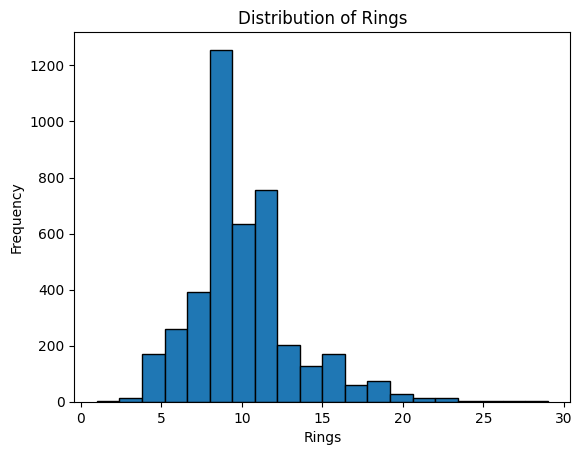

In [8]:
plt.hist(df['Rings'], bins=20, edgecolor='black')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.title('Distribution of Rings')
plt.show()


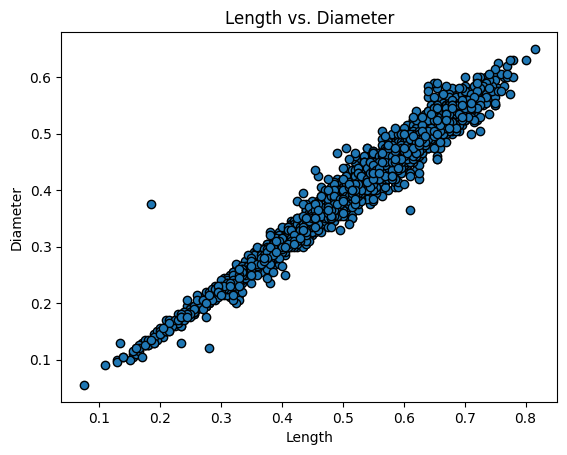

In [9]:
plt.scatter(df['Length'], df['Diameter'], edgecolor='black')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('Length vs. Diameter')
plt.show()

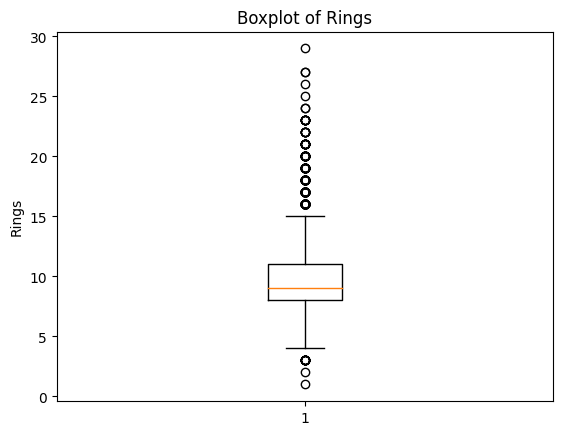

In [10]:
plt.boxplot(df['Rings'])
plt.ylabel('Rings')
plt.title('Boxplot of Rings')
plt.show()

Sex
0    11.129304
1     7.891791
2    10.705497
Name: Rings, dtype: float64


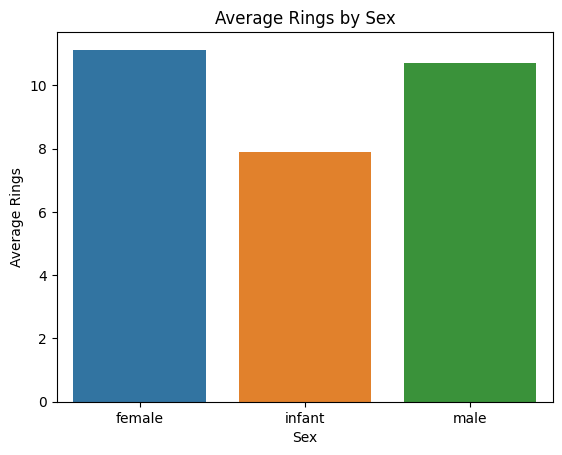

In [11]:
avg_rings = df.groupby('Sex')['Rings'].mean()
print(avg_rings)

# Define the labels for the Sex column
labels = {0: 'female', 1: 'infant', 2: 'male'}

# Group by Sex and compute the mean Rings for each group
avg_rings = df.groupby('Sex')['Rings'].mean()

ax = sns.barplot(x=avg_rings.index.map(labels), y=avg_rings.values)
ax.set(xlabel='Sex', ylabel='Average Rings', title='Average Rings by Sex')
plt.show()


In [12]:
X = df.drop('Rings', axis=1)
y = df['Rings']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42) # epoch - a batch of dataset
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_valid)

# Calculate the MSE
mse = mean_squared_error(y_valid, y_pred)
print("MSE:", mse)


MSE: 4.967740119760479


The MSE is a measure of how well the model is able to predict the number of Rings. A lower MSE indicates better performance. In this case, the MSE is relatively low, which suggests that the model is able to make reasonably accurate predictions.